# EDA and Machine Learning - Capstone Project

In [43]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [44]:
#Importing and Read the three CSV files
df1 = pd.read_csv('Table1.csv')
df2 = pd.read_csv('Table2.csv')
df3 = pd.read_csv('Table3.csv')

The dataset has 1,338 rows and 7 columns

In [45]:
# Concatenate the DataFrames vertically
df = pd.concat([df1, df2, df3], axis=1)
df

,Name,Category,Price,No_of_color,ColorName,No_of_Review,Quantification,Star_rating
0,Trailstorm™ Waterproof Walking Shoe,Women,90.0,1,"['Dark Grey', 'Bright Gold']",212.0,This comfortable and waterproof hiking shoe of...,4.080
1,Trailstorm™ Waterproof Walking Shoe,Women,90.0,1,"['Graphite', 'Dolphin']",83.0,This comfortable and waterproof hiking shoe of...,4.181
2,Facet™ 75 Alpha Outdry™ Lightweight Waterproof...,Men,155.0,1,"['Cypress', 'Cloud Grey']",15.0,lightweight technical waterproof shoe for comf...,3.600
3,Facet™ 75 Alpha Outdry™ Lightweight Waterproof...,Women,155.0,1,"['Deep Madeira', 'Red Coral']",4.0,lightweight technical waterproof boot for comf...,5.000
4,Facet™ 75 Mid Outdry Waterproof Hiking Shoe,Men,135.0,1,"['Mercury', 'Raw', 'Light Sand']",28.0,technical waterproof hiking shoe designed for ...,4.500
5,Facet™ 75 Outdry™ Waterproof Hiking Shoe,Men,125.0,2,"['Mercury', 'Raw', 'Fiery', 'Black']",21.0,technical waterproof hiking shoe designed for ...,3.952
6,Facet™ 75 Outdry™ Waterproof Hiking Shoe,Women,125.0,2,"['Beetroot', 'Sage', 'Wild', 'Sand', 'Frosted ...",12.0,technical waterproof hiking shoe designed for ...,4.583
7,Facet™ 75 Mid Outdry™ Waterproof Hiking Shoe,Women,135.0,1,"['Sedona Sage', 'Dusty', 'Bright', 'Mauve', 'G...",29.0,technical waterproof hiking shoe designed for ...,4.310
8,Peakfreak™ II Hiking Shoe,Men,100.0,1,"['Black', 'Ti Grey Steel']",13.0,lightweight technical hiking shoe for all day ...,3.923
9,Peakfreak™ II Mid Outdry™ Walking Boot,Men,125.0,1,"['Peatmoss', 'Titanium', 'Grey', 'Black']",33.0,lightweight but technical men's walking boot w...,4.212


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             20 non-null     object 
 1   Category         20 non-null     object 
 2   Price            20 non-null     float64
 3   No_of_color      20 non-null     int64  
 4   ColorName        20 non-null     object 
 5   No_of_Review     19 non-null     float64
 6   Quantification   20 non-null     object 
 7   Star_rating      20 non-null     float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.4+ KB


In [46]:
df.shape

(20, 8)

In [47]:
df.columns.tolist()

['Name',
 'Category',
 'Price',
 'No_of_color',
 'ColorName ',
 'No_of_Review',
 'Quantification ',
 'Star_rating']

In [48]:
df.isnull().sum()

Name               0
Category           0
Price              0
No_of_color        0
ColorName          0
No_of_Review       1
Quantification     0
Star_rating        0
dtype: int64

Observation:
There is a null value in one of the columns. ie No_of_Review  

<Axes: >

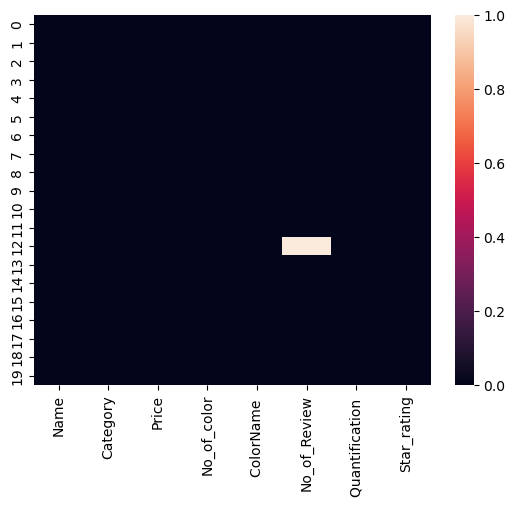

In [8]:
#Visualization of null value using heatmap
sns.heatmap(df.isnull())

Observations:
No of review has 19 instead of 20. This leterally means one has no review at all and it means zero value. ie No review.

In [49]:
# fill the Null value in No_of Review with zero(0)
# its an indication the product has no review at all and can be denoted as zero review
df.fillna(0, inplace=True)

In [50]:
df.describe()

,Price,No_of_color,No_of_Review,Star_rating
count,20.000000,20.000000,20.000000,20.000000
mean,114.000000,1.450000,37.750000,4.410050
std,21.496634,0.825578,47.384069,0.404476
min,80.000000,1.000000,0.000000,3.600000
25%,97.500000,1.000000,10.500000,4.155750
50%,115.000000,1.000000,25.500000,4.457000
75%,125.000000,2.000000,52.000000,4.673750
max,155.000000,4.000000,212.000000,5.000000


Observations:
These insights provide an overview of the price range, color options, popularity (measured by the number of reviews), and overall satisfaction (measured by star ratings) of the shoes in the dataset.

1. Price:
The average price of the shoes is $114.
Prices range from $80 to $155.
Most shoes fall within the range of $97.50 to $125.
The standard deviation is $21.50, indicating the dispersion of prices around the mean.

2. No_of_color:
On average, each shoe comes in 1.45 colors.
The majority have 1 or 2 color options.
The range is from 1 to 4 color options.
The standard deviation is 0.83, showing variance in the number of colors available.

3. No_of_Review:
On average, each shoe has approximately 37.75 reviews.
The range of reviews is from 0 to 212.
25% of the shoes have less than 10.5 reviews, while 75% have less than 52 reviews.
The standard deviation is relatively high at 47.38, suggesting significant variability in the number of reviews.

4. Star_rating:
The average star rating is approximately 4.41 out of 5.
Ratings range from 3.6 to a maximum of 5.
Most ratings fall within the range of 4.16 to 4.67.
The standard deviation is relatively low at 0.40, indicating less variability in ratings compared to other columns.

In [51]:
#\checking non numeric columns for their uniqueness(if any)
df.describe(include='O')

,Name,Category,ColorName,Quantification
count,20,20,20,20
unique,15,2,20,15
top,Trailstorm™ Waterproof Walking Shoe,Women,"['Dark Grey', 'Bright Gold']",This comfortable and waterproof hiking shoe of...
freq,2,10,1,2


Remarks:
1. Name:
There are a total of 20 different shoe names in the dataset.
The most common shoe name, "Trailstorm™ Waterproof Walking Shoe," appears twice in the dataset.

2. Category:
The dataset consists of two categories: Men and Women.
Both category appearing 10 times each of the 20 entries.

3. ColorName:
There are 20 unique color combinations among the shoes.
Each color combination appears only once in the dataset, indicating no repeated color schemes.

4. Quantification:
The "Quantification" is text descriptions about the shoes that detail comfort, durability /quality/performance.
Each description seems unique, as there are 15 unique entries in the column.
The most frequent description occurs twice, indicating a slight repetition in the dataset for a particular shoe description

<Axes: >

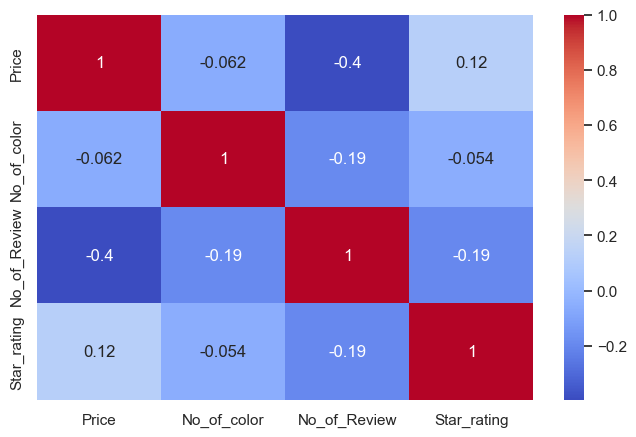

In [52]:
# Visualizing the Correlation Matrix
corr = df.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [53]:
#Show in ascending order the correlation of variables with charges 
corr = df.corr()
corr['Price'].sort_values(ascending = False)

Price           1.000000
Star_rating     0.124157
No_of_color    -0.062278
No_of_Review   -0.395280
Name: Price, dtype: float64

Observations:
1. Price and Star_rating: There is a positive correlation of 0.12. Though it suggests a weak positive relationship between the price of shoes and star rating. It could indicate that price and star rating might not be strongly related.
2. Price and No_of_color: The correlation of -0.06 indicates a very weak negative relationship between the price of a product and the number of colors available. This suggests that there is almost no relationship between these variables.
3. Price and No_of_Review: A negative correlation of -0.40 implies a moderate negative relationship between the price of a product and the number of reviews it has received. This could suggest that higher-priced shoes tend to receive fewer reviews.

In summary, correlation doesn't actaully imply causation. The values indicate the strength and direction of the linear relationship between variables but don't necessarily translate to cause-and-effect relationship.

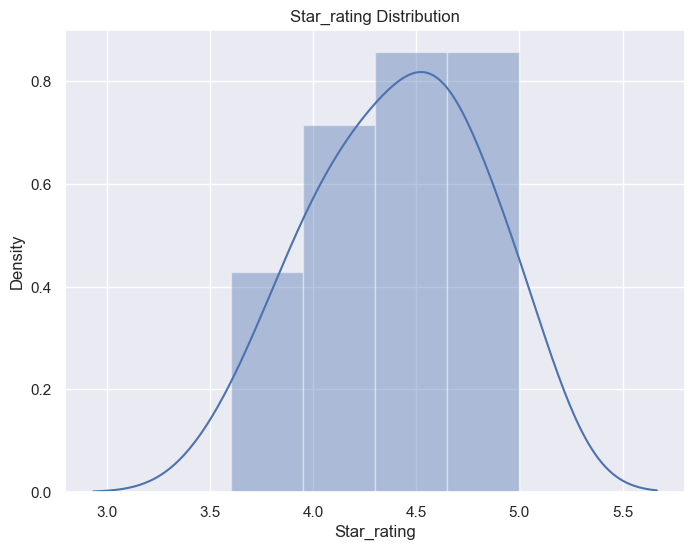

In [14]:
#Showing the distribution of numeric variables - Star_rating 
sns.set()
plt.figure(figsize=(8, 6))
sns.distplot(df['Star_rating'])
plt.title('Star_rating Distribution')
plt.show()

Remarks:
Star rating range from 3.5 of 5 to 5.0 of 5.0. The highest rating are from 4.5 and 5.0. Its an indication that the shoes have good rating metrics.

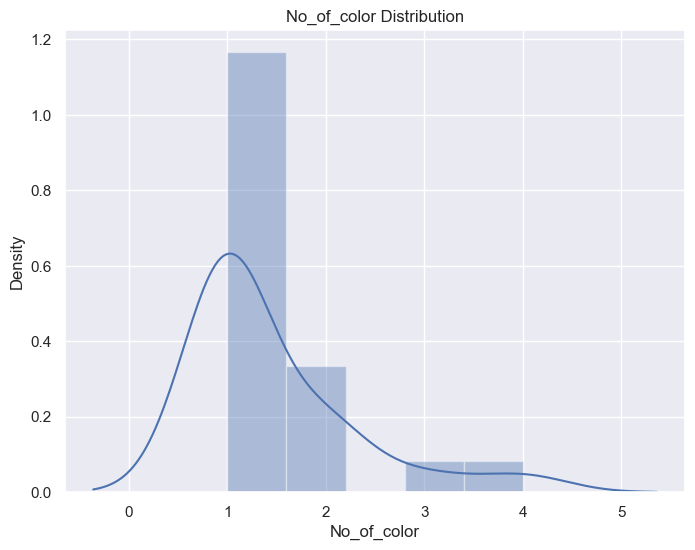

In [15]:
#Showing the distribution of numeric variables - No_of_color
sns.set()
plt.figure(figsize=(8, 6))
sns.distplot(df['No_of_color'])
plt.title('No_of_color Distribution')
plt.show()

Remarks:
The visualization suggests most shoe has one color. with fewer shoes have different colour range from 2 - 4 but number not as much as half of those with one color.

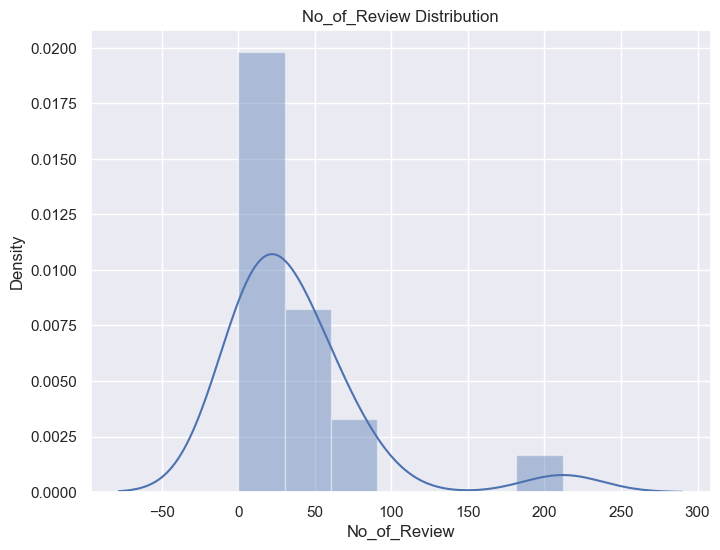

In [16]:
#Showing the distribution of numeric variables - Star_rating 
sns.set()
plt.figure(figsize=(8, 6))
sns.distplot(df['No_of_Review'])
plt.title('No_of_Review Distribution')
plt.show()

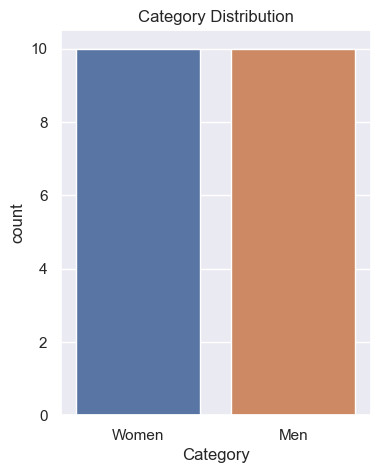

NameError: name 'shoe_df' is not defined

In [100]:
#Distribution of category variables 
plt.figure(figsize=(4, 5))
sns.countplot(x = 'Category', data=df)
plt.title('Category Distribution')
plt.show()
shoe_df['Category'].value_counts()

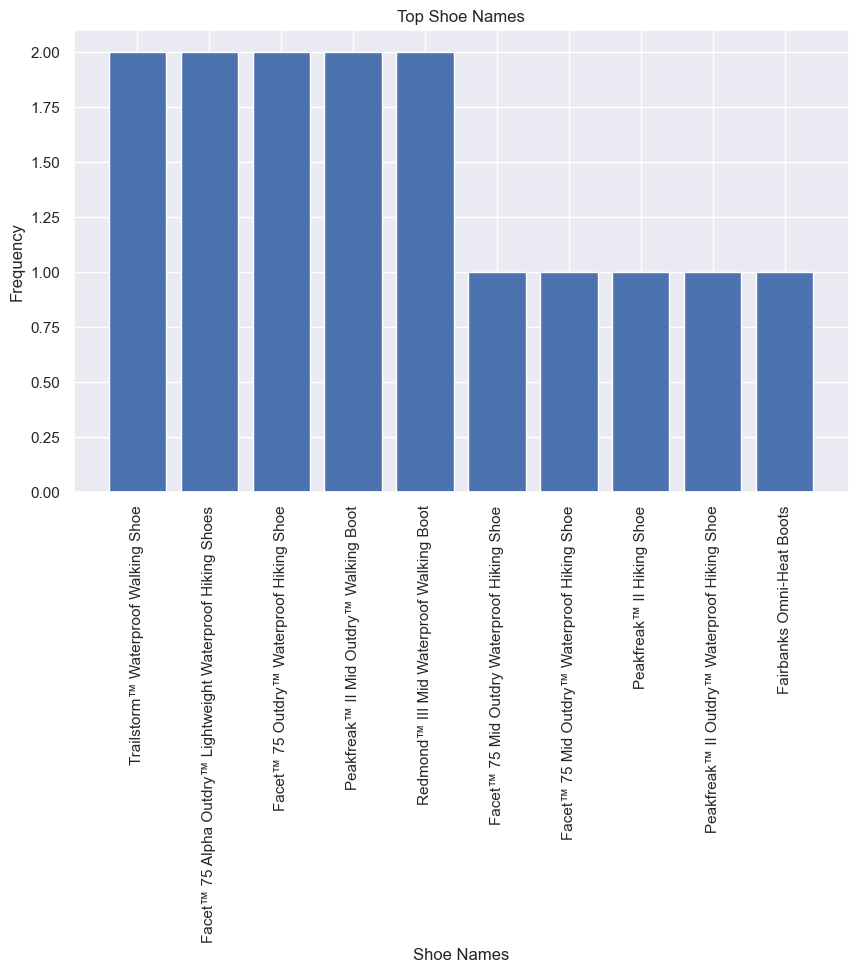

In [18]:
# Data preparation
top_shoe_names = df['Name'].value_counts().head(10)
shoe_names = top_shoe_names.index
shoe_counts = top_shoe_names.values

# Creating a bar chart
plt.figure(figsize=(10, 6))
plt.bar(shoe_names, shoe_counts)
plt.title('Top Shoe Names')
plt.xlabel('Shoe Names')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

Observations:
The visualization shows the top 10 shoes type.

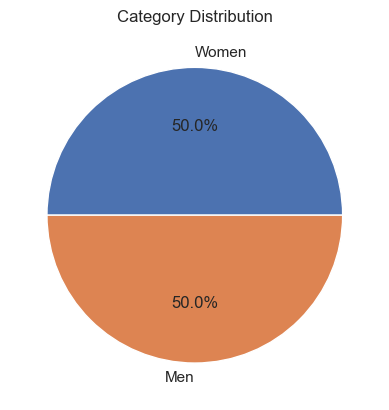

In [19]:
#Pie Chart - Category Distribution
category_distribution = df['Category'].value_counts()
plt.pie(category_distribution, labels=category_distribution.index, autopct='%1.1f%%')
plt.title('Category Distribution')
plt.show()

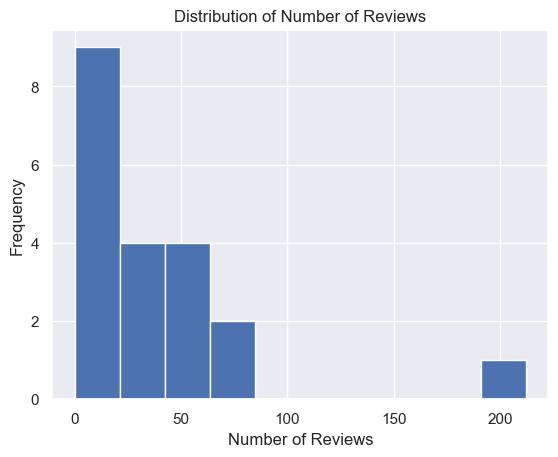

In [20]:
# Histogram - No_of_Review
plt.hist(df['No_of_Review'], bins=10)
plt.title('Distribution of Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

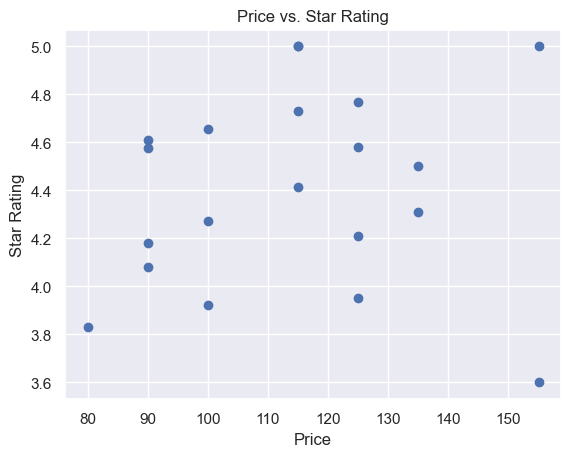

In [23]:
# Scatter Plot - Price vs. Star_rating
plt.scatter(df['Price'], df['Star_rating'])
plt.title('Price vs. Star Rating')
plt.xlabel('Price')
plt.ylabel('Star Rating')
plt.show()

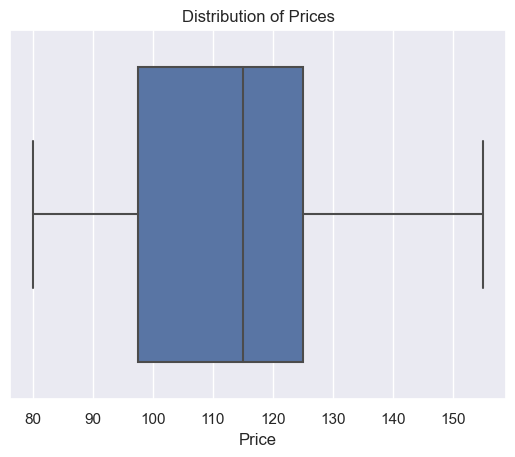

In [24]:
# Box Plot - Price
sns.boxplot(x='Price', data=df)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.show()

# Visualization of high and low price distribution with category of shoe type

In [27]:
# Define high and low prices based on a threshold
high_price = df['Price'].quantile(0.75)
low_price = df['Price'].quantile(0.25)

In [28]:
# Create a new column to categorize prices as high, low, or medium
df['Price_Category'] = 'Medium'
df.loc[df['Price'] > high_price, 'Price_Category'] = 'High'
df.loc[df['Price'] < low_price, 'Price_Category'] = 'Low'

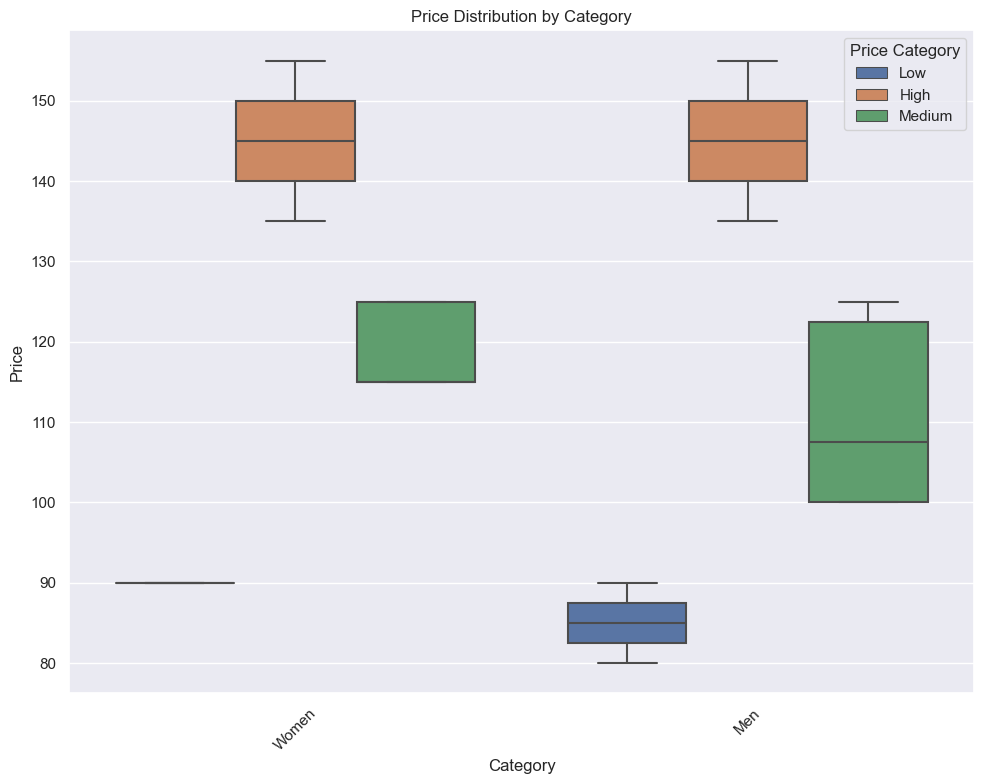

In [29]:
# Create a boxplot or violin plot to visualize price distribution by category
plt.figure(figsize=(10, 8))
sns.boxplot(x='Category', y='Price', hue='Price_Category', data=df)
plt.title('Price Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Price')
plt.legend(title='Price Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Remarks:
It could be seen from the above, lower price of shoes are from Men category while both category share the highest price. However, highest numbers are feasible for medium price in the men category than women counter part.

This suggests women and men like could have both medium and higher prices for shoes, but much more lower prices are available for Men category than woemn(if any).

In [30]:
# To make a copy of the DataFrame before commencing further analysis
copied_df = df.copy()

In [31]:
copied_df

,Name,Category,Price,No_of_color,ColorName,No_of_Review,Quantification,Star_rating,Price_Category
0,Trailstorm™ Waterproof Walking Shoe,Women,90.0,1,"['Dark Grey', 'Bright Gold']",212.0,This comfortable and waterproof hiking shoe of...,4.080,Low
1,Trailstorm™ Waterproof Walking Shoe,Women,90.0,1,"['Graphite', 'Dolphin']",83.0,This comfortable and waterproof hiking shoe of...,4.181,Low
2,Facet™ 75 Alpha Outdry™ Lightweight Waterproof...,Men,155.0,1,"['Cypress', 'Cloud Grey']",15.0,lightweight technical waterproof shoe for comf...,3.600,High
3,Facet™ 75 Alpha Outdry™ Lightweight Waterproof...,Women,155.0,1,"['Deep Madeira', 'Red Coral']",4.0,lightweight technical waterproof boot for comf...,5.000,High
4,Facet™ 75 Mid Outdry Waterproof Hiking Shoe,Men,135.0,1,"['Mercury', 'Raw', 'Light Sand']",28.0,technical waterproof hiking shoe designed for ...,4.500,High
5,Facet™ 75 Outdry™ Waterproof Hiking Shoe,Men,125.0,2,"['Mercury', 'Raw', 'Fiery', 'Black']",21.0,technical waterproof hiking shoe designed for ...,3.952,Medium
6,Facet™ 75 Outdry™ Waterproof Hiking Shoe,Women,125.0,2,"['Beetroot', 'Sage', 'Wild', 'Sand', 'Frosted ...",12.0,technical waterproof hiking shoe designed for ...,4.583,Medium
7,Facet™ 75 Mid Outdry™ Waterproof Hiking Shoe,Women,135.0,1,"['Sedona Sage', 'Dusty', 'Bright', 'Mauve', 'G...",29.0,technical waterproof hiking shoe designed for ...,4.310,High
8,Peakfreak™ II Hiking Shoe,Men,100.0,1,"['Black', 'Ti Grey Steel']",13.0,lightweight technical hiking shoe for all day ...,3.923,Medium
9,Peakfreak™ II Mid Outdry™ Walking Boot,Men,125.0,1,"['Peatmoss', 'Titanium', 'Grey', 'Black']",33.0,lightweight but technical men's walking boot w...,4.212,Medium


# Machine learning code to make predictions
# Price.

In [55]:
#Importing required Libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

There is need to encode some Non numerical columns to numeric for the better analysis

In [32]:
#encoding Category column 
copied_df.replace ({'Category':{'Men':1, 'Women':0}}, inplace=True)
copied_df.replace ({'Price_Category':{'Low':0, 'Medium':1, 'High' :2}}, inplace=True)

In [33]:
# Check column data types
print(copied_df.dtypes)

Name                object
Category             int64
Price              float64
No_of_color          int64
ColorName           object
No_of_Review       float64
Quantification      object
Star_rating        float64
Price_Category       int64
dtype: object


In [ ]:
copied_df

In [34]:
# Define X and Y variables
X = copied_df[['Category', 'No_of_color', 'No_of_Review', 'Star_rating']]
Y = copied_df['Price']

In [35]:
X

,Category,No_of_color,No_of_Review,Star_rating
0,0,1,212.0,4.080
1,0,1,83.0,4.181
2,1,1,15.0,3.600
3,0,1,4.0,5.000
4,1,1,28.0,4.500
5,1,2,21.0,3.952
6,0,2,12.0,4.583
7,0,1,29.0,4.310
8,1,1,13.0,3.923
9,1,1,33.0,4.212


In [36]:
Y

0      90.0
1      90.0
2     155.0
3     155.0
4     135.0
5     125.0
6     125.0
7     135.0
8     100.0
9     125.0
10    115.0
11    125.0
12    115.0
13     80.0
14     90.0
15     90.0
16    115.0
17    100.0
18    115.0
19    100.0
Name: Price, dtype: float64

Remarks:
1. Scaling - Scaling technique is required when we have features with different scales or units (suvh as if one feature is in kilograms and another in meters). This is not the case with the dataset, thus, its not used here.

2. Hyperparameter Tuning - it is essential to optimize model's performance as it helps to fine-tune the settings of the algorithm that are not learned during training and also prevent overfitting or underfitting by finding the best settings for your model
In order to maximize the performamnce of the predictoive model to use, Hyperparameter tuning is being applied.

In [37]:
# spliting the dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [38]:
print(X.shape, X_train.shape, Y_test.shape)

(20, 4) (16, 4) (4,)


In [39]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [56]:
Y_pred = model.predict(X_test)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
r2 = r2_score(Y_test, Y_pred)

# Model Evaluation
Since the dataset is very small, it's crucial to use models that are less prone to overfitting and can handle limited amounts of data effectively. The study therefore used some suitable machine learning models which are similar to linear regression and good for small datasets

In [99]:
# determine R-square value
r2_test = metrics.r2_score(Y_test, df_pred)
print('R Squared :', r2_test)

AttributeError: 'DataFrame' object has no attribute 'r2_score'

In [59]:
# Decision Tree
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_train, Y_train)
tree_pred = tree.predict(X_test)
tree_rmse = mean_squared_error(Y_test, tree_pred, squared=False)
tree_r2 = r2_score(Y_test, tree_pred)

In [60]:
# Random Forest
forest = RandomForestRegressor(n_estimators=100, max_depth=5)
forest.fit(X_train, Y_train)
forest_pred = forest.predict(X_test)
forest_rmse = mean_squared_error(Y_test, forest_pred, squared=False)
forest_r2 = r2_score(Y_test, forest_pred)

In [61]:
# Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, Y_train)
ridge_pred = ridge.predict(X_test)
ridge_rmse = mean_squared_error(Y_test, ridge_pred, squared=False)
ridge_r2 = r2_score(Y_test, ridge_pred)

In [62]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, Y_train)
lasso_pred = lasso.predict(X_test)
lasso_rmse = mean_squared_error(Y_test, lasso_pred, squared=False)
lasso_r2 = r2_score(Y_test, lasso_pred)

In [65]:
# Support Vector Machine
svm = SVR(kernel='rbf', C=1.0)
svm.fit(X_train, Y_train)
svm_pred = svm.predict(X_test)
svm_rmse = mean_squared_error(Y_test, svm_pred, squared=False)
svm_r2 = r2_score(Y_test, svm_pred)

In [63]:
# K-Nearest Neighbors
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)
knn_rmse = mean_squared_error(Y_test, knn_pred, squared=False)
knn_r2 = r2_score(Y_test, knn_pred)

Remarks:
The evaluation metrics used here are Root Mean Squared Error (RMSE) and R-squared (R2). RMSE measures the average deviation of predictions from the actual values, while R2 measures the proportion of variance in the dependent variable explained by the model


# Evaluation metrics for each model 

In [66]:
print("Linear Regression:")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")
print("\n")
      
print("Decision Tree:")
print("RMSE:", tree_rmse)
print("R2 Score:", tree_r2)
print("\n")

print("Random Forest:")
print("RMSE:", forest_rmse)
print("R2 Score:", forest_r2)
print("\n")

print("Ridge Regression:")
print("RMSE:", ridge_rmse)
print("R2 Score:", ridge_r2)
print("\n")

print("Lasso Regression:")
print("RMSE:", lasso_rmse)
print("R2 Score:", lasso_r2)
print("\n")

print("Support Vector Machine:")
print("RMSE:", svm_rmse)
print("R2 Score:", svm_r2)
print("\n")

print("K-Nearest Neighbors:")
print("RMSE:", knn_rmse)
print("R2 Score:", knn_r2)

Linear Regression:
RMSE: 23.366329934259934
R2 Score: -1.1437462560851706


Decision Tree:
RMSE: 12.374368670764582
R2 Score: 0.39877300613496935


Random Forest:
RMSE: 16.64551701827118
R2 Score: -0.08789491751874512


Ridge Regression:
RMSE: 23.37121895594533
R2 Score: -1.1446434374939423


Lasso Regression:
RMSE: 23.440952432636255
R2 Score: -1.1574606172235211


Support Vector Machine:
RMSE: 15.313209731930657
R2 Score: 0.07928582166735387


K-Nearest Neighbors:
RMSE: 7.106335201775948
R2 Score: 0.8017177914110429


Comparison of evaluation metrics for each model. 

In [67]:
data = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machine', 'K-Nearest Neighbors'],
    'RMSE': [rmse, ridge_rmse, lasso_rmse, tree_rmse, forest_rmse, svm_rmse, knn_rmse],
    'R2 Score': [r2, ridge_r2, lasso_r2, tree_r2, forest_r2, svm_r2, knn_r2]
}

metrics = pd.DataFrame(data)
print(metrics)

                    Model       RMSE  R2 Score
0       Linear Regression  23.366330 -1.143746
1        Ridge Regression  23.371219 -1.144643
2        Lasso Regression  23.440952 -1.157461
3           Decision Tree  12.374369  0.398773
4           Random Forest  16.645517 -0.087895
5  Support Vector Machine  15.313210  0.079286
6     K-Nearest Neighbors   7.106335  0.801718


Observations:
1. Linear Regression, Ridge, and Lasso Regression:
These models show poor performance based on the RMSE and R2 Score. The negative R2 score suggest that these models are performing worse.

2. Decision Tree:
This shows a better performance compared to linear-based models with a significantly lower RMSE and a positive R2 Score.

3. Random Forest and Support Vector Machine:
Both perform better than linear-based models but don't surpass the Decision Tree model's performance in terms of R-square value

4. K-Nearest Neighbors:
Indicates the best performance among the evaluated models with the lowest RMSE and a high R2 Score of 0.80. It seems to capture the relationship between features and the target variable better than other models and can explain the relation up to 80%

Summarily, K-Nearest Neighbors seems to be the most suitable model for this dataset, Although, further investigation, fine-tuning, and feature engineering might improve the performance of other models as well. 

In [68]:
# saving the model using .pkl
import joblib
joblib.dump(knn, "Shoe price prediction.pkl")

['Shoe price prediction.pkl']

In [69]:
#Predict the saved model
knn = joblib.load("Shoe price prediction.pkl")

In [ ]:
#checking the prediction with original value
a = np.array(Y_test)
copied_df = pd.DataFrame()
copied_df["Predicted"] = prediction
copied_df["Original"] = a
copied_df

In [70]:
#Prediction
prediction = knn.predict(X_test)
prediction

array([115., 126., 115., 101.])

The outpout provides the predicted price of shoes in £

In [71]:
#checking the prediction with original value
a = np.array(Y_test)
copied_df = pd.DataFrame()
copied_df["Predicted"] = prediction
copied_df["Original"] = a
copied_df

,Predicted,Original
0,115.0,115.0
1,126.0,135.0
2,115.0,115.0
3,101.0,90.0


# Machine learning code to make predictions
# Star rating

In [72]:
df2 = df.copy()
df2

,Name,Category,Price,No_of_color,ColorName,No_of_Review,Quantification,Star_rating
0,Trailstorm™ Waterproof Walking Shoe,Women,90.0,1,"['Dark Grey', 'Bright Gold']",212.0,This comfortable and waterproof hiking shoe of...,4.080
1,Trailstorm™ Waterproof Walking Shoe,Women,90.0,1,"['Graphite', 'Dolphin']",83.0,This comfortable and waterproof hiking shoe of...,4.181
2,Facet™ 75 Alpha Outdry™ Lightweight Waterproof...,Men,155.0,1,"['Cypress', 'Cloud Grey']",15.0,lightweight technical waterproof shoe for comf...,3.600
3,Facet™ 75 Alpha Outdry™ Lightweight Waterproof...,Women,155.0,1,"['Deep Madeira', 'Red Coral']",4.0,lightweight technical waterproof boot for comf...,5.000
4,Facet™ 75 Mid Outdry Waterproof Hiking Shoe,Men,135.0,1,"['Mercury', 'Raw', 'Light Sand']",28.0,technical waterproof hiking shoe designed for ...,4.500
5,Facet™ 75 Outdry™ Waterproof Hiking Shoe,Men,125.0,2,"['Mercury', 'Raw', 'Fiery', 'Black']",21.0,technical waterproof hiking shoe designed for ...,3.952
6,Facet™ 75 Outdry™ Waterproof Hiking Shoe,Women,125.0,2,"['Beetroot', 'Sage', 'Wild', 'Sand', 'Frosted ...",12.0,technical waterproof hiking shoe designed for ...,4.583
7,Facet™ 75 Mid Outdry™ Waterproof Hiking Shoe,Women,135.0,1,"['Sedona Sage', 'Dusty', 'Bright', 'Mauve', 'G...",29.0,technical waterproof hiking shoe designed for ...,4.310
8,Peakfreak™ II Hiking Shoe,Men,100.0,1,"['Black', 'Ti Grey Steel']",13.0,lightweight technical hiking shoe for all day ...,3.923
9,Peakfreak™ II Mid Outdry™ Walking Boot,Men,125.0,1,"['Peatmoss', 'Titanium', 'Grey', 'Black']",33.0,lightweight but technical men's walking boot w...,4.212


In [73]:
#encoding Category column 
df2.replace ({'Category':{'Men':1, 'Women':0}}, inplace=True)

In [74]:
df2

,Name,Category,Price,No_of_color,ColorName,No_of_Review,Quantification,Star_rating
0,Trailstorm™ Waterproof Walking Shoe,0,90.0,1,"['Dark Grey', 'Bright Gold']",212.0,This comfortable and waterproof hiking shoe of...,4.080
1,Trailstorm™ Waterproof Walking Shoe,0,90.0,1,"['Graphite', 'Dolphin']",83.0,This comfortable and waterproof hiking shoe of...,4.181
2,Facet™ 75 Alpha Outdry™ Lightweight Waterproof...,1,155.0,1,"['Cypress', 'Cloud Grey']",15.0,lightweight technical waterproof shoe for comf...,3.600
3,Facet™ 75 Alpha Outdry™ Lightweight Waterproof...,0,155.0,1,"['Deep Madeira', 'Red Coral']",4.0,lightweight technical waterproof boot for comf...,5.000
4,Facet™ 75 Mid Outdry Waterproof Hiking Shoe,1,135.0,1,"['Mercury', 'Raw', 'Light Sand']",28.0,technical waterproof hiking shoe designed for ...,4.500
5,Facet™ 75 Outdry™ Waterproof Hiking Shoe,1,125.0,2,"['Mercury', 'Raw', 'Fiery', 'Black']",21.0,technical waterproof hiking shoe designed for ...,3.952
6,Facet™ 75 Outdry™ Waterproof Hiking Shoe,0,125.0,2,"['Beetroot', 'Sage', 'Wild', 'Sand', 'Frosted ...",12.0,technical waterproof hiking shoe designed for ...,4.583
7,Facet™ 75 Mid Outdry™ Waterproof Hiking Shoe,0,135.0,1,"['Sedona Sage', 'Dusty', 'Bright', 'Mauve', 'G...",29.0,technical waterproof hiking shoe designed for ...,4.310
8,Peakfreak™ II Hiking Shoe,1,100.0,1,"['Black', 'Ti Grey Steel']",13.0,lightweight technical hiking shoe for all day ...,3.923
9,Peakfreak™ II Mid Outdry™ Walking Boot,1,125.0,1,"['Peatmoss', 'Titanium', 'Grey', 'Black']",33.0,lightweight but technical men's walking boot w...,4.212


In [75]:
# Define X and Y variables
X1 = df2[['Category', 'No_of_color', 'No_of_Review', 'Price']]
Y1 = df2['Star_rating']

In [76]:
X1

,Category,No_of_color,No_of_Review,Price
0,0,1,212.0,90.0
1,0,1,83.0,90.0
2,1,1,15.0,155.0
3,0,1,4.0,155.0
4,1,1,28.0,135.0
5,1,2,21.0,125.0
6,0,2,12.0,125.0
7,0,1,29.0,135.0
8,1,1,13.0,100.0
9,1,1,33.0,125.0


In [77]:
Y1

0     4.080
1     4.181
2     3.600
3     5.000
4     4.500
5     3.952
6     4.583
7     4.310
8     3.923
9     4.212
10    4.733
11    4.769
12    4.414
13    3.833
14    4.577
15    4.609
16    5.000
17    4.271
18    5.000
19    4.654
Name: Star_rating, dtype: float64

In [78]:
# spliting the dataset into train and test
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=2)

In [79]:
print(X1.shape, X1_train.shape, Y1_test.shape)

(20, 4) (16, 4) (4,)


In [80]:
model = LinearRegression()
model.fit(X1_train, Y1_train)

LinearRegression()

In [81]:
Y1_pred = model.predict(X1_test)
rmse_1 = mean_squared_error(Y1_test, Y1_pred, squared=False)
r2_1 = r2_score(Y1_test, Y1_pred)

In [82]:
# Decision Tree
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X1_train, Y1_train)
tree_pred = tree.predict(X1_test)
tree_rmse_1 = mean_squared_error(Y1_test, tree_pred, squared=False)
tree_r2_1 = r2_score(Y1_test, tree_pred)

In [84]:
# Random Forest
forest = RandomForestRegressor(n_estimators=100, max_depth=5)
forest.fit(X1_train, Y1_train)
forest_pred = forest.predict(X1_test)
forest_rmse_1 = mean_squared_error(Y1_test, forest_pred, squared=False)
forest_r2_1 = r2_score(Y1_test, forest_pred)

In [85]:
# Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(X1_train, Y1_train)
ridge_pred = ridge.predict(X1_test)
ridge_rmse_1 = mean_squared_error(Y1_test, ridge_pred, squared=False)
ridge_r2_1 = r2_score(Y1_test, ridge_pred)

In [86]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X1_train, Y1_train)
lasso_pred = lasso.predict(X1_test)
lasso_rmse_1 = mean_squared_error(Y1_test, lasso_pred, squared=False)
lasso_r2_1 = r2_score(Y1_test, lasso_pred)

In [87]:
# Support Vector Machine
svm = SVR(kernel='rbf', C=1.0)
svm.fit(X1_train, Y1_train)
svm_pred = svm.predict(X1_test)
svm_rmse_1 = mean_squared_error(Y_test, svm_pred, squared=False)
svm_r2_1 = r2_score(Y1_test, svm_pred)

# Evaluation of the models - star rating prediction

In [88]:
# K-Nearest Neighbors
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X1_train, Y1_train)
knn_pred = knn.predict(X1_test)
knn_rmse_1 = mean_squared_error(Y1_test, knn_pred, squared=False)
knn_r2_1 = r2_score(Y1_test, knn_pred)

In [89]:
print("Linear Regression:")
print(f"RMSE: {rmse_1}")
print(f"R2 Score: {r2_1}")
print("\n")
      
print("Decision Tree:")
print("RMSE:", tree_rmse_1)
print("R2 Score:", tree_r2_1)
print("\n")

print("Random Forest:")
print("RMSE:", forest_rmse_1)
print("R2 Score:", forest_r2_1)
print("\n")

print("Ridge Regression:")
print("RMSE:", ridge_rmse_1)
print("R2 Score:", ridge_r2_1)
print("\n")

print("Lasso Regression:")
print("RMSE:", lasso_rmse_1)
print("R2 Score:", lasso_r2_1)
print("\n")

print("Support Vector Machine:")
print("RMSE:", svm_rmse_1)
print("R2 Score:", svm_r2_1)
print("\n")

print("K-Nearest Neighbors:")
print("RMSE:", knn_rmse_1)
print("R2 Score:", knn_r2_1)

Linear Regression:
RMSE: 0.3725354565703168
R2 Score: -0.27973098688577025


Decision Tree:
RMSE: 0.3281409758015599
R2 Score: 0.0071025641616747626


Random Forest:
RMSE: 0.14511662771204095
R2 Score: 0.80581404570893


Ridge Regression:
RMSE: 0.3711467657874011
R2 Score: -0.27020792927817516


Lasso Regression:
RMSE: 0.38393648267359926
R2 Score: -0.3592590163169942


Support Vector Machine:
RMSE: 110.50813152718801
R2 Score: 0.3787089058038956


K-Nearest Neighbors:
RMSE: 0.40261459238333597
R2 Score: -0.4947290721022046


In [91]:
#Comparing the models metrics and evalaution
data_1 = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machine', 'K-Nearest Neighbors'],
    'RMSE': [rmse_1, ridge_rmse_1, lasso_rmse_1, tree_rmse_1, forest_rmse_1, svm_rmse_1, knn_rmse_1],
    'R2 Score': [r2_1, ridge_r2_1, lasso_r2_1, tree_r2_1, forest_r2_1, svm_r2_1, knn_r2_1]
}

metrics_1 = pd.DataFrame(data_1)
print(metrics_1)

                    Model        RMSE  R2 Score
0       Linear Regression    0.372535 -0.279731
1        Ridge Regression    0.371147 -0.270208
2        Lasso Regression    0.383936 -0.359259
3           Decision Tree    0.328141  0.007103
4           Random Forest    0.145117  0.805814
5  Support Vector Machine  110.508132  0.378709
6     K-Nearest Neighbors    0.402615 -0.494729


Observations:
1. Random Forest:
It significantly outperforms other models, by demonstrating a considerably lower RMSE and a high R2 Score of 0.805. This suggests it captures more variability in the data and provides better predictions compared to the rest.

2. Linear Regression, Ridge, and Lasso Regression:
These models exhibit similar performance indicated by RMSE and R2 Score but they show relatively poor performance with negative R2 scores, suggesting they might not capture the variation in the data well.

In overall, Random Forest exhibits superiority among other models, Random Forest stands out as the best performer, displaying the lowest error and the highest ability to explain variance in the data. It seems to be the most suitable model for this dataset.

In [93]:
# saving the model using .pkl
import joblib
joblib.dump(forest, "Shoe star rating prediction.pkl")

['Shoe star rating prediction.pkl']

In [94]:
#Predict the saved model
forest = joblib.load("Shoe price prediction.pkl")

In [97]:
#Prediction
prediction_1 = forest.predict(X_test)
prediction_1

array([115., 126., 115., 101.])

# Final remarks and Conclusion

This project began with the combination of three CSV datasets, each representing different aspects of shoe details. After combining and preprocessing, null value was filled and encoding was applied to categorical columns like 'Category' 

Exploratory Data Analysis (EDA) ensued, uncovering insights into shoe attributes and their distributions. Visualizations were employed to illustrate the distribution of prices and re grouped into lower, midium and high prices, and other features.

Utilizing machine learning models, the goal was to predict shoe prices and star ratings. The models employed included Linear Regression, Ridge and Lasso Regression, Decision Tree, Random Forest, Support Vector Machine (SVM), and K-Nearest Neighbors (KNN). Root Mean Squared Error (RMSE) and R2 Score were used as Evaluation metrics to assess their performance.

The findings indicate that Linear Regression-based models (Linear, Ridge, Lasso) struggled to capture the complexities within the dataset, exhibiting poor predictive performance and negative R2 scores. Decision Tree showed moderate performance, Random Forest emerged as the top-performing model, demonstrating the lowest error and the highest explanatory power (R2 Score of 0.805) at predicting the star rating while K-Nearest Neighbors (KNN) surpassed others for prices prediction.

In conclusion, based on the evaluation metrics, K-Nearest Neighbors (KNN) and Random Forest appears to be the most suitable model for predicting shoe prices and star rating respectively. However, other models may need further investigation and refinement to improve their performance. This project underscores the significance of employing various models and the necessity for feature engineering and hyperparameter tuning to optimize predictive capabilities in machine learning tasks.

# End